## This notebook should be in the same folder as CIDER_showcase contents 
from  https://github.com/jf678-cornell/CIDER 

In [7]:
import numpy as np
#import scipy.io
import matplotlib.pyplot as plt
from CIDER import response_from_all_injections_and_CO2,AOD_from_injection, pattern_from_all_injections_and_CO2
from Toolbox import global_mean, lat_band_mean, stack_and_zoh_injections
import CIDER

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import xarray as xr
import os

import xesmf as xe
import pandas as pd

In [14]:
#define regridding function 

def regrid(in_dataset, target_dataarray): 
    regridder = xe.Regridder(in_dataset, target_dataarray, 'conservative', periodic=False)
    regridded_dataset = regridder(in_dataset)
    return regridded_dataset

# load files from 

df = pd.read_pickle('extra2plot/df_pickle')  # where you saved df from '3_WorkingModels.ipynb'
ITDs_modelmean = np.mean(df.itd_anom)

era5_itd = pd.read_pickle('extra2plot/era5_itd')  # where you saved this from '3_WorkingModels.ipynb'

pat_pr_UKESM = xr.open_dataset('patterns_UKCESM_precip/patterns_precip_17.nc')   # these two are loaded separately
pat_pr_CESM = xr.open_dataset('patterns_UKCESM_precip/patterns_precip_18.nc')

# these are diff to numbers above because I was saving files from 1 and python indexes from 0
UKESM_index = 16
CESM_index = 17

In [9]:
# changing anoms to a different mean if needed

#for i in range(len(df.itd_anom)):
 #   df.itd_anom[i] = df.itd_anom[i][:] - df.itd_anom[i][slice(165,175)].mean()

#for i in range(len(df.tpc_anom)):
 #   df.tpc_anom[i] = df.tpc_anom[i][:] - df.tpc_anom[i][slice(145,175)].mean()

## important - define CIDER version first (UKESM / CESM) 

go to 'load_all_other_variables.py' and change the following line:

mat = scipy.io.loadmat(f'parameters/UKESM_params.mat')

to the following:

#model = 'CESM' <br>
model = 'UKESM' <br>
mat = scipy.io.loadmat(f'parameters/{model}_params.mat') 

to be able to swap between models. comment out whichever is not in use.




In [12]:
run load_all_other_variables.py

In [15]:
print(model) # to check which version is activated

UKESM


In [16]:
# set number of years

total_years = 65
years_represented_by_array_element = 5 # 1/ ArrayLength 

In [17]:
# no injection scenarios

no_injection = np.zeros((total_years*12, 7))
no_injection_and_CO2 = np.concatenate((no_injection,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

SSP245_T_response = response_from_all_injections_and_CO2(no_injection_and_CO2, param_AOD_all, param_T_all)
SSP245_T_pattern = pattern_from_all_injections_and_CO2(no_injection_and_CO2, param_AOD_all, param_T_all, all_T_patterns_scaled)

s245_name = 'SSP245'

# Defining several scenarios 

In [18]:
inj = [2,5,8,9,9,10,10,10.5,11,11,11,12,12]
#these are Tg/yr, each number in array corresponding to number of years defined above

In [19]:
# 1 - ARCTIC - UKESM to PI

scen1_name = 'Arctic-High'

i_60N = np.array(inj)
i_60N_a1 = i_60N
i_30N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_0NS = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_30S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_60S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

i_scen1 = stack_and_zoh_injections((i_60N, i_30N, i_15N, i_0NS, i_15S, i_30S, i_60S),years_represented_by_array_element*12)
all_injection_and_CO2_scen1 = np.concatenate((i_scen1,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

In [20]:
# 2 - ARCTIC - UKESM stay 2035

scen2_name = 'Arctic-Low'

i_60N = np.array([2,4,5,6,7,8,9,10,10,11,11,12,12])/2
i_60N_a2 = i_60N
i_30N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_0NS = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_30S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_60S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_arctic = [i_60N, i_30N, i_15N, i_0NS, i_15S, i_30S, i_60S]

i_scen2 = stack_and_zoh_injections((i_60N, i_30N, i_15N, i_0NS, i_15S, i_30S, i_60S),years_represented_by_array_element*12)
all_injection_and_CO2_scen2 = np.concatenate((i_scen2,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

In [21]:
# 3 - GLOBAL

scen3_name = 'Global'

i_60N = np.array(inj)/7
i_30N = np.array(inj)/7
i_15N = np.array(inj)/7
i_0NS = np.array(inj)/7
i_15S = np.array(inj)/7
i_30S = np.array(inj)/7
i_60S = np.array(inj)/7

i_scen3 = stack_and_zoh_injections((i_60N, i_30N, i_15N, i_0NS, i_15S, i_30S, i_60S),years_represented_by_array_element*12)
all_injection_and_CO2_scen3 = np.concatenate((i_scen3,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

In [22]:
# 4 - ANTARCTIC

scen4_name = 'Antarctic'

i_60N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_30N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15N = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_0NS = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_15S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_30S = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
i_60S = np.array(inj)

i_scen4 = stack_and_zoh_injections((i_60N, i_30N, i_15N, i_0NS, i_15S, i_30S, i_60S),years_represented_by_array_element*12)
all_injection_and_CO2_scen4 = np.concatenate((i_scen4,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

In [23]:
# getting patterns and responses for each scenario

scen1_pattern = pattern_from_all_injections_and_CO2(all_injection_and_CO2_scen1, param_AOD_all, param_T_all, all_T_patterns_scaled)
scen2_pattern = pattern_from_all_injections_and_CO2(all_injection_and_CO2_scen2, param_AOD_all, param_T_all, all_T_patterns_scaled)
scen3_pattern = pattern_from_all_injections_and_CO2(all_injection_and_CO2_scen3, param_AOD_all, param_T_all, all_T_patterns_scaled)
scen4_pattern = pattern_from_all_injections_and_CO2(all_injection_and_CO2_scen4, param_AOD_all, param_T_all, all_T_patterns_scaled)
scen_patterns = [SSP245_T_pattern, scen1_pattern, scen2_pattern, scen3_pattern, scen4_pattern]

scen1_response = response_from_all_injections_and_CO2(all_injection_and_CO2_scen1, param_AOD_all, param_T_all)
scen2_response = response_from_all_injections_and_CO2(all_injection_and_CO2_scen2, param_AOD_all, param_T_all)
scen3_response = response_from_all_injections_and_CO2(all_injection_and_CO2_scen3, param_AOD_all, param_T_all)
scen4_response = response_from_all_injections_and_CO2(all_injection_and_CO2_scen4, param_AOD_all, param_T_all)
scen_responses = [SSP245_T_response, scen1_response, scen2_response, scen3_response, scen4_response]


[ 2.   5.   8.   9.   9.  10.  10.  10.5 11.  11.  11.  12.  12. ]


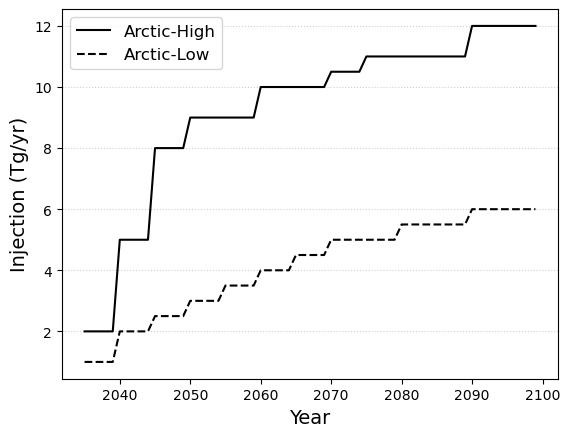

<Figure size 640x480 with 0 Axes>

In [24]:
# plot injections 

i_60N_a1_full = np.repeat(i_60N_a1, 5)
i_60N_a2_full = np.repeat(i_60N_a2, 5)

i_60N_yrs = np.arange(2035,2035+(len(i_60N_a1)*5), 1)

# Plot the first line: solid blue
plt.plot(i_60N_yrs, i_60N_a1_full, 
         color='k', 
         linestyle='-', 
         label='Arctic-High')

# Plot the second line: dashed blue
plt.plot(i_60N_yrs, i_60N_a2_full, 
         color='k', 
         linestyle='--', 
         label='Arctic-Low')

# Add titles and labels for the axes
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Injection (Tg/yr)', fontsize = 14)
#plt.title('Comparison of Injection Scenarios')

# Add a legend to identify the lines
plt.legend(fontsize = 12)
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Display the plot
plt.show()
plt.tight_layout()
plt.savefig(f'figures/injections.jpg', dpi=350)

In [25]:
# response months into years
scen_resp_list = []

for i in scen_responses:
    response_reshaped = i.reshape(65,12)
    rr_mean = response_reshaped.mean(axis = -1)
    scen_resp_list.append(rr_mean)

In [26]:
# creating coordinates 

lon = np.linspace(0, 360, 288, endpoint=False)
lat = np.linspace(-90, 90, 192)
years_2035_2100 = np.arange(2035,2100,1)
years_1855_2095 = np.arange(1855,2096,1)
years_2035_2095 = np.arange(2035,2096,1)

lat2d, lon2d = np.meshgrid(lat, lon)

lat2d_NH = lat2d[:, 96:] 
lon2d_NH = lon2d[:, 96:] 

lat2d_SH = lat2d[:, :96] 
lon2d_SH = lon2d[:, :96] 

weights = np.cos(np.deg2rad(lat))
weights_NH = weights[96:] 
weights_SH = weights[:96] 

In [27]:
# creating NH, SH, IHTD 

scens_IHTD = []
scens_NHs = []
scens_SHs = []
scens_pats = []
scen_names = [s245_name, scen1_name, scen2_name, scen3_name, scen4_name]

for i in range(len(scen_patterns)):
    SAI_pattern_reshaped = scen_patterns[i].reshape(288, 192, total_years, 12) # split inot years and months
    SAI_pat = SAI_pattern_reshaped.mean(axis=-1)   # avg over years
    scens_pats.append(SAI_pat)
    
    SAI_NH_pat = SAI_pat[:, 96: , :]  # isolate NH   # cause lats are from -90 to 90
    SAI_SH_pat = SAI_pat[:, :96 , :]  # isolate SH
    
    SAI_NH_avglat = np.average(SAI_NH_pat, weights = weights_NH, axis = 1)
    SAI_NH = np.average(SAI_NH_avglat, axis = 0)
    scens_NHs.append(SAI_NH)
    
    SAI_SH_avglat = np.average(SAI_SH_pat, weights = weights_SH, axis = 1)
    SAI_SH = np.average(SAI_SH_avglat, axis = 0)
    scens_SHs.append(SAI_SH)
    
    SAI_ITD = SAI_NH - SAI_SH
    scens_IHTD.append(SAI_ITD)


    

In [28]:
if model == 'UKESM':
    scens_IHTD_UKESM, scens_NHs_UKESM, scens_SHs_UKESM, scens_pats_UKESM, scen_names_UKESM = scens_IHTD, scens_NHs, scens_SHs, scens_pats,  scen_names
elif model == 'CESM':
    scens_IHTD_CESM, scens_NHs_CESM, scens_SHs_CESM, scens_pats_CESM, scen_names_CESM = scens_IHTD, scens_NHs, scens_SHs, scens_pats, scen_names


# !!!  Stop here and change model !!!

## rerun from beginning to get both UKESM and CESM data defined. 
## after running from beginning for each model, continue down

.
.
.
.
.
# Plot CIDER v 2035 SAI scenarios

NameError: name 'scens_IHTD_CESM' is not defined

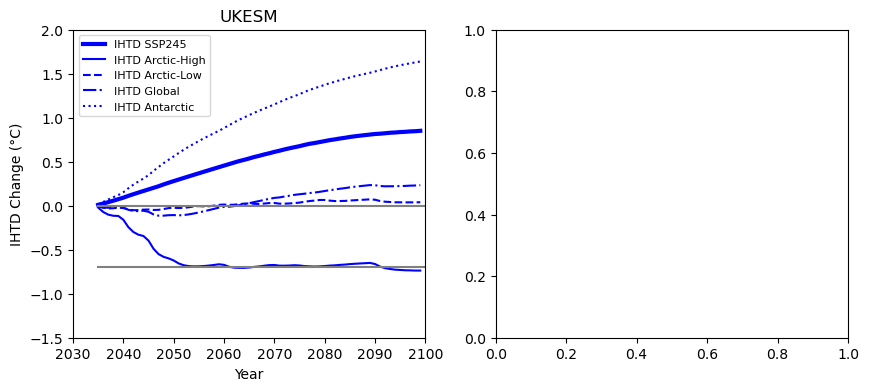

In [29]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

lss = ['-', '--', '-.', ':']

# UKESM
ax = axs[0]
ax.plot(years_2035_2100, scens_IHTD_UKESM[0], color='blue', linestyle='-', lw = 3, label='IHTD SSP245') 
for i in range(len(scens_IHTD)-1):
    ax.plot(years_2035_2100, scens_IHTD_UKESM[i+1], color='blue', linestyle=lss[i], label=f'IHTD {scen_names[i+1]}') 
    ax.legend(fontsize = 8)

ax.set_xlabel('Year')
ax.set_ylabel('IHTD Change (°C)')
ax.set_ylim(-1.5,2)
ax.set_xlim(2030, 2100)
ax.set_title('UKESM')
ax.plot ([2035, 2100], [-0.7, -0.7], c = 'grey') 
ax.plot ([2035, 2100], [0, 0], c = 'grey') 
    
# CESM 
ax = axs[1]
ax.plot(years_2035_2100, scens_IHTD_CESM[0], color='green', linestyle='-', lw = 3, label='IHTD SSP245') 
for i in range(len(scens_IHTD)-1):
    ax.plot(years_2035_2100, scens_IHTD_CESM[i+1], color='green', linestyle=lss[i], label=f'IHTD {scen_names[i+1]}') 
    ax.legend(fontsize = 8)

ax.set_xlabel('Year')
#ax.set_ylabel('IHTD Change (°C)')
ax.set_ylim(-1.5,2)
ax.set_xlim(2030, 2100)
ax.set_title('CESM')


# giving a title to my graph
#plt.title(f'{model}, SAI at 60N: {injection_60N} (each {years_represented_by_array_element} yrs)', fontsize = 12)
plt.savefig('figures/inj_scenarios.jpg', dpi = 350)
plt.show()

# Joining UKESM, CESM and CIDER 

In [ ]:
# def function

def itd_change_for_scen_UKESM(SAI_ITD, s245_ITD):
    SAI_ITD_short = SAI_ITD[:61]
    s245_ITD_short = s245_ITD[:61]
    SAI_change = s245_ITD_short - SAI_ITD_short
    SAI_changed = df.itd_anom[16][-61:] - SAI_change
    return SAI_change, SAI_changed

def itd_change_for_scen_CESM(SAI_ITD, s245_ITD):
    SAI_ITD_short = SAI_ITD[:61]
    s245_ITD_short = s245_ITD[:61]
    SAI_change = s245_ITD_short - SAI_ITD_short
    SAI_changed = df.itd_anom[17][-61:] - SAI_change
    return SAI_change, SAI_changed

In [ ]:
# run separately 

UKESM_SAI_change = []
UKESM_SAI_changed = []
for i in range(len(scens_IHTD)):
    scen_UKESM_change, scen_UKESM_changed = itd_change_for_scen_UKESM(scens_IHTD_UKESM[i], scens_IHTD_UKESM[0])
    UKESM_SAI_change.append(scen_UKESM_change)
    UKESM_SAI_changed.append(scen_UKESM_changed)

CESM_SAI_change = []
CESM_SAI_changed = []
for i in range(len(scens_IHTD)):
    scen_CESM_change, scen_CESM_changed = itd_change_for_scen_CESM(scens_IHTD_CESM[i], scens_IHTD_CESM[0])
    CESM_SAI_change.append(scen_CESM_change)
    CESM_SAI_changed.append(scen_CESM_changed)   

In [ ]:
# UKESM, CESM through 2035

# ITDs 

UKESM_ITD_2035 = df.itd_anom[UKESM_index][-61]
CESM_ITD_2035 = df.itd_anom[CESM_index][-61]

UKESM_ITD_through_2035 = df.itd_anom[UKESM_index] - UKESM_ITD_2035
CESM_ITD_through_2035 = df.itd_anom[CESM_index] - CESM_ITD_2035

# GMTs 

UKESM_GMT_2035 = df.gmt_anom[UKESM_index][-61]
CESM_GMT_2035 = df.gmt_anom[CESM_index][-61]

UKESM_GMT_through_2035 = df.gmt_anom[UKESM_index] - UKESM_GMT_2035
CESM_GMT_through_2035 = df.gmt_anom[CESM_index] - CESM_GMT_2035

In [ ]:
# only ssp245

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

ax = axs[1]
ax.plot(years_2035_2100, scens_IHTD_UKESM[0], color='blue', linestyle=':', lw = 3, label='CIDER UKESM1') 
ax.plot(years_2035_2100, scens_IHTD_CESM[0], color='green', linestyle=':', lw = 3, label='CIDER CESM2') 

ax.plot(years_1855_2095,UKESM_ITD_through_2035, color = 'blue', ls = '-', lw = 3, label = 'model UKESM1')
ax.plot(years_1855_2095,CESM_ITD_through_2035, color = 'green', ls = '-', lw = 3, label = 'model CESM2')

ax.plot
ax.set_xlim(2035,2100)
ax.set_ylim(-1, 2)
ax.legend(fontsize = 7)
ax.set_title('IHTD change from 2035')
ax.set_ylabel('IHTD', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.plot([2025, 2025], [-1.2, 2.7], color = 'gray', linewidth = 0.5)


ax = axs[0]

ax.plot(years_2035_2100, (scens_NHs_UKESM[0] + scens_SHs_UKESM[0]) / 2, color='blue', linestyle=':', lw = 3, label='CIDER UKESM1') 
ax.plot(years_2035_2100, (scens_NHs_CESM[0] + scens_SHs_CESM[0]) /2 , color='green', linestyle=':', lw = 3, label='CIDER CESM2') 

ax.plot(years_1855_2095, UKESM_GMT_through_2035, color='blue', linestyle='-', lw = 3, label='model UKESM1') 
ax.plot(years_1855_2095, CESM_GMT_through_2035, color='green', linestyle='-', lw = 3, label='model CESM2') 


ax.set_xlim(2035,2100)
ax.set_ylim(-0.5, 2.5)
ax.legend(fontsize = 7)
ax.set_title('GMT change from 2035')
ax.set_ylabel('GMT', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.plot([2025, 2025], [-1.2, 2.7], color = 'gray', linewidth = 0.5)

plt.tight_layout()
plt.savefig('figures/1cider_v_s245.jpg', dpi = 350)
plt.show()

In [ ]:
# all scenarios

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

ax = axs[0]

ax.plot(years_1855_2095,df.itd_anom[UKESM_index], color = 'blue', ls = '-', lw = 3, label = 'SSP245')
for i in range(len(UKESM_SAI_changed)-2):
    ax.plot(years_2035_2095, UKESM_SAI_changed[i+2], color='blue', linestyle=lss[i+1], label=f'{scen_names[i+2]} SAI') 
ax.plot(years_2035_2095, UKESM_SAI_changed[1], color='darkturquoise', linestyle='-', label=f'{scen_names[1]} SAI')
ax.set_xlim(2000,2100)
ax.set_ylim(-2, 2.5)
ax.legend(fontsize = 8)
ax.set_title('UKESM', fontsize = 15)
ax.set_ylabel('IHTD ($^\circ$C)', fontsize=15)
#ax.grid(axis = 'y')
#ax.set_xlabel('Year', fontsize=12)
#ax.plot([2025, 2025], [-1.2, 2.7], color = 'gray', linewidth = 0.5)


ax = axs[1]

ax.plot(years_1855_2095,df.itd_anom[CESM_index], color = 'green', ls = '-', lw = 3, label = 'SSP245')
for i in range(len(CESM_SAI_changed)-2):
    ax.plot(years_2035_2095, CESM_SAI_changed[i+2], color='green', linestyle=lss[i+1], label=f'{scen_names[i+2]} SAI') 
ax.plot(years_2035_2095, CESM_SAI_changed[1], color='yellowgreen', linestyle='-', label=f'{scen_names[1]} SAI')
ax.set_xlim(2000,2100)
ax.set_ylim(-2, 2.5)
ax.legend(fontsize = 8)
ax.set_title('CESM', fontsize = 15)
#ax.grid(axis = 'y')
#ax.set_ylabel('IHTD', fontsize=12)
#ax.set_xlabel('Year', fontsize=12)
#ax.plot([2025, 2025], [-1.2, 2.7], color = 'gray', linewidth = 0.5)

plt.tight_layout()
plt.savefig('figures/ts_ihtd.jpg', dpi = 350)
plt.show()

In [ ]:
tpc_UKESM = df.tpc_anom[16]
tpc_CESM = df.tpc_anom[17]
tpc_35_UKESM = tpc_UKESM[-61:]
tpc_35_CESM = tpc_CESM[-61:]

slope_UKESM = 0.13747334822734375
slope_CESM = -0.14113747722833622

UKESM_TPC_changed = []
CESM_TPC_changed = []

for i in range(len(CESM_SAI_changed)):
    TPC_changed_UKESM = tpc_35_UKESM - UKESM_SAI_change[i] * slope_UKESM
    TPC_changed_CESM = tpc_35_CESM - CESM_SAI_change[i] * slope_CESM
    UKESM_TPC_changed.append(TPC_changed_UKESM)
    CESM_TPC_changed.append(TPC_changed_CESM)

In [ ]:
'''diffs_itd = []
diffs_tpc = []
for i in range(5):
    diff_itd = CESM_SAI_changed[i][-10:].mean() - UKESM_SAI_changed[i][-10:].mean()
    print(diff_itd)
    diffs_itd.append(diff_itd)

print(UKESM_SAI_changed[1][-10:].mean() - UKESM_SAI_changed[4][-10:].mean())
print(CESM_SAI_changed[1][-10:].mean() - CESM_SAI_changed[4][-10:].mean())

print(UKESM_TPC_changed[1][-10:].mean() - UKESM_TPC_changed[4][-10:].mean())
print(CESM_TPC_changed[1][-10:].mean() - CESM_TPC_changed[4][-10:].mean())

print(f'UKESM EOC TPC for Arcitc1 is {UKESM_TPC_changed[1][-10:].mean()}, Antarctic {UKESM_TPC_changed[4][-10:].mean()}, SSP245 {UKESM_TPC_changed[0][-10:].mean()}')
print(f'CESM EOC TPC for Arcitc1 is {CESM_TPC_changed[1][-10:].mean()}, Antarctic {CESM_TPC_changed[4][-10:].mean()}, SSP245 {CESM_TPC_changed[0][-10:].mean()}')
'''

UKESM_TPC_changed[0][-15:].mean()



In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

ax = axs[0]

s = ax.plot(years_1855_2095,df.tpc_anom[UKESM_index], color = 'blue', ls = '-', lw = 3, label = 'SSP245')
for i in range(len(UKESM_TPC_changed)-2):
    o = ax.plot(years_2035_2095, UKESM_TPC_changed[i+2], color='blue', linestyle=lss[i+1], label=f'{scen_names[i+2]} SAI') 
a = ax.plot(years_2035_2095, UKESM_TPC_changed[1], color='darkturquoise', linestyle='-', label=f'{scen_names[1]} SAI')
ax.set_xlim(2000,2100)
ax.set_ylim(-0.8, 0.5)
ax.legend(fontsize = 8, loc = 'lower left')
#ax.set_title('UKESM, anomaly to 1940-1960')
ax.set_ylabel('TPC ($^\circ$)', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
#ax.plot([2025, 2025], [-1, 1], color = 'gray', linewidth = 0.5)


ax = axs[1]

ax.plot(years_1855_2095,df.tpc_anom[CESM_index], color = 'green', ls = '-', lw = 3, label = 'SSP245')
for i in range(len(CESM_TPC_changed)-2):
    ax.plot(years_2035_2095, CESM_TPC_changed[i+2], color='green', linestyle=lss[i+1], label=f'{scen_names[i+2]} SAI') 
ax.plot(years_2035_2095, CESM_TPC_changed[1], color='yellowgreen', linestyle='-', label=f'{scen_names[1]} SAI')
ax.set_xlim(2000,2100)
ax.set_ylim(-0.8, 0.5)
ax.legend(fontsize = 8)
#ax.set_title('CESM, anomaly to 1940-1960')
#ax.set_ylabel('TPC', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
#ax.plot([2025, 2025], [-1, 1], color = 'gray', linewidth = 0.5)


plt.tight_layout()
plt.savefig('figures/ts_tpc.jpg', dpi = 350)
plt.show()

# maps 

In [ ]:
# retreive model patterns

patterns_precip = []

for i in [17,18]:
    filepath = f'patterns_UKCESM_precip/patterns_precip_{i}.nc'
    file = xr.open_dataset(filepath) * 86400
    patterns_precip.append(file)

patterns_temp = []

for i in [17,18]:
    filepath = f'patterns_UKCESM/patterns_{i}.nc'
    file = xr.open_dataset(filepath)
    patterns_temp.append(file)

In [ ]:
pats_cider = [scen1_pattern, scen2_pattern, scen3_pattern, scen4_pattern]
pats_t_models = patterns_precip
pats_pr_models = patterns_temp

# T or P maps : models 

In [ ]:
# plot absolute temp or precip for specific year

var = 'Precip'
year_index =  241 # from 1850, max = 241
model2use = 'UKESM'  # UKESM CESM

if var == 'Precip':
    norm = TwoSlopeNorm(vmin=0.0, vcenter=0.00005 * 86400 , vmax=0.0001 * 86400)  
    cmap = 'BrBG'
    units = '(mm/day)'
    if model2use == 'UKESM':
        in_dataset = patterns_precip[0].pr[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = patterns_precip[1].pr[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = patterns_precip[1].pr[year_index].T
    else:
        print('uhm what')

if var == 'Temp':
    cmap = 'RdBu_r'
    norm = TwoSlopeNorm(vmin=220, vcenter=273, vmax=326)  # Adjust vmin/vmax to fit your data range
    units = '($^\circ$C)'
    if model2use == 'UKESM':
        in_dataset = patterns_temp[0].tas[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = patterns_temp[1].tas[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = patterns_temp[1].tas[year_index].T
    else:
        print('uhm what')


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f"{model2use}: absolute {var} in {1850 + year_index} - {1850 + year_index + 9}"
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()

In [ ]:
# anomaly to PI: models  

var = 'Temp'
anom_base, name = slice(1850,1900), '1850-1900'
anom_base, name = slice(2020,2030), '2020-2030'
year_index = 241 # from 1850, last is 241
model2use = 'UKESM'  #UKESM CESM 

anoms_2035 = []

if var == 'Precip':
    for i in range(len(patterns_precip)):
        pi = patterns_precip[i].sel(year = anom_base).mean(dim = 'year')
        anom = patterns_precip[i] - pi
        anoms_2035.append(anom)
    norm = TwoSlopeNorm(vmin=-0.00004 * 86400 , vcenter=0, vmax=0.00004 * 86400)  
    cmap = 'BrBG'
    units = '(mm/day)'
    if model2use == 'UKESM':
        in_dataset = anoms_2035[0].pr[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = anoms_2035[1].pr[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = anoms_2035[1].pr[year_index].T
    else:
        print('uhm what')

if var == 'Temp':
    for i in range(len(patterns_temp)):
        pi = patterns_temp[i].sel(year = anom_base).mean(dim = 'year')
        anom = patterns_temp[i] - pi
        anoms_2035.append(anom)
    cmap = 'RdBu_r'
    norm = TwoSlopeNorm(vmin=-6, vcenter=0, vmax=6)  # Adjust vmin/vmax to fit your data range
    units = '($^\circ$C)'
    if model2use == 'UKESM':
        in_dataset = anoms_2035[0].tas[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = anoms_2035[1].tas[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = anoms_2035[1].tas[year_index].T
    else:
        print('uhm what')


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f"{model2use}: {var} anomaly: {1850 + year_index}-{1859 + year_index} to {name}"
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()

In [ ]:

anom_base, name = slice(1850,1900), '1850-1900'
anoms_2035 = []


for i in range(2):
    pi = patterns_temp[i].sel(year = anom_base).mean(dim = 'year')
    anom = patterns_temp[i] - pi
    anoms_2035.append(anom.isel(year = -1))

in_dataset = anoms_2035[0].tas.rename({'y':'latitude', 'x':'longitude'}) #UKESM
target_da = anoms_2035[1].tas.rename({'y':'latitude', 'x':'longitude'})  #CESM
UKESM_to_plot = regrid(in_dataset, target_da).T


CESM_to_plot = anoms_2035[1].tas.T

data_to_plot = np.asarray(UKESM_to_plot) - np.asarray(CESM_to_plot)


In [ ]:
# anomaly to each other: models  

var = 'Precip'
anom_base, anom_name = slice(1850,1900), '1850-1900'
#year_index = 241 # from 1850, last is 241
eoc_slice, eoc_name = slice(2080,2100), '2080-2100'
model2use = 'UKESM'  #UKESM CESM 

anoms_2035 = []

if var == 'Precip':
    for i in range(len(patterns_precip)):
        pi = patterns_precip[i].sel(year = anom_base).mean(dim = 'year')
      #  eoc_slice =
        anom =  patterns_precip[i] - pi
        anoms_2035.append(anom.sel(year = slice(2080,2100)).mean(dim = 'year'))
    norm = TwoSlopeNorm(vmin=-0.00004 * 86400 , vcenter=0, vmax=0.00004 * 86400)  
    cmap = 'BrBG'
    units = '(mm/day)'
    
    in_dataset = anoms_2035[0].pr.rename({'y':'latitude', 'x':'longitude'}) #UKESM
    target_da = anoms_2035[1].pr.rename({'y':'latitude', 'x':'longitude'})  #CESM
    UKESM_to_plot = regrid(in_dataset, target_da).T
    
    CESM_to_plot = anoms_2035[1].pr.T

    data_to_plot = np.asarray(UKESM_to_plot) - np.asarray(CESM_to_plot)


if var == 'Temp':
    for i in range(len(patterns_temp)):
        pi = patterns_temp[i].sel(year = anom_base).mean(dim = 'year')
        anom = patterns_temp[i] - pi
        anoms_2035.append(anom.isel(year = -1))
    cmap = 'RdBu_r'
    norm = TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)  # Adjust vmin/vmax to fit your data range
    units = '($^\circ$C)'

    # regrid UKESM 
    in_dataset = anoms_2035[0].tas.rename({'y':'latitude', 'x':'longitude'}) #UKESM
    target_da = anoms_2035[1].tas.rename({'y':'latitude', 'x':'longitude'})  #CESM
    UKESM_to_plot = regrid(in_dataset, target_da).T

    CESM_to_plot = anoms_2035[1].tas.T

    data_to_plot = np.asarray(UKESM_to_plot) - np.asarray(CESM_to_plot)


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f" UKESM - CESM {var} anomaly ({eoc_name} to PI)"
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()

In [ ]:
pr

In [ ]:
# anomaly to a year: models 

anom_base = 2035
year_index = 241 # from 1850, last is 241
model2use = 'CESM'  #UKESM CESM or CIDER
scenario = 2    # 0 to 4: 0 = ssp245, 1= arc1, 2 = arc2, 3 = global, 4 = ant

if var == 'Precip':
    for i in range(len(patterns_precip)):
        pi = patterns_precip[i].sel(year = anom_base)
        anom = patterns_precip[i] - pi
        anoms_2035.append(anom)
    norm = TwoSlopeNorm(vmin=-0.00004 * 86400 , vcenter=0, vmax=0.00004 * 86400)  
    cmap = 'BrBG'
    units = '(mm/day)'
    if model2use == 'UKESM':
        in_dataset = anoms_2035[0].pr[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = anoms_2035[1].pr[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = anoms_2035[1].pr[year_index].T
    else:
        print('uhm what')

if var == 'Temp':
    for i in range(len(patterns_temp)):
        pi = patterns_temp[i].sel(year = anom_base)
        anom = patterns_temp[i] - pi
        anoms_2035.append(anom)
    cmap = 'RdBu_r'
    norm = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)  # Adjust vmin/vmax to fit your data range
    units = '($^\circ$C)'
    if model2use == 'UKESM':
        in_dataset = anoms_2035[0].tas[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
        target_da = anoms_2035[1].tas[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
        data_to_plot = regrid(in_dataset, target_da).T
    elif model2use == 'CESM':
        data_to_plot = anoms_2035[1].tas[year_index].T
    else:
        print('uhm what')


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f"{model2use}: {var} anomaly: {1855 + year_index} to {anom_base}"
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()

# T maps : CIDER

In [ ]:
# CIDER anomaly  

model2use = 'CESM'  # UKESM or CESM
year_index = 64
scenario = 0   # 0 to 4: 0 = ssp245, 1 = arc1, 2 = arc2, 3 = global, 4 = antarctic


cmap = 'RdBu_r'
norm = TwoSlopeNorm(vmin=-6, vcenter=0, vmax=6)  # Adjust vmin/vmax to fit your data range
units = '($^\circ$C)'

if model2use == 'UKESM':
    data_to_plot = scens_pats_UKESM[scenario][:,:,year_index]
elif model2use == 'CESM':
    data_to_plot = scens_pats_CESM[scenario][:,:,year_index]
else:
    print('uhm what')


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f"{model2use}: {scen_names[scenario]} SAI: {var} anomaly {2035 + year_index +1} to 2035"
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()

In [ ]:
# combined plot code is udpated from figure above by gemini


# 1. Setup the figure with 10 subplots (5 rows, 2 columns)
fig, axs = plt.subplots(
    nrows=5,
    ncols=2,
    figsize=(12, 14),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# 2. Define constants and lists for looping
models_to_plot = ['UKESM', 'CESM']
scenarios_to_plot = range(5)  # Indices 0 to 4
year_index = 64
cmap = 'RdBu_r'
norm = TwoSlopeNorm(vmin=-6, vcenter=0, vmax=6)
units = '($^\circ$C)'

# 3. Loop through each scenario (row) and model (column)
for row, scenario_idx in enumerate(scenarios_to_plot):
    for col, model_name in enumerate(models_to_plot):
        
        ax = axs[row, col]

        # --- Set Column and Row Titles ---
        # Set a title for the column, but only on the first row of plots
        if row == 0:
            ax.set_title(model_name, fontsize=14)
        
        # Set a y-label for the row, but only on the first column of plots
        if col == 0:
            ax.set_ylabel(scen_names[scenario_idx], fontsize=14)
        
        # Select the correct data
        if model_name == 'UKESM':
            data_to_plot = scens_pats_UKESM[scenario_idx][:, :, year_index]
        else:
            data_to_plot = scens_pats_CESM[scenario_idx][:, :, year_index]

        # Add map features
        
        ax.gridlines()
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.set_global()

        # Plot the data
        img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm=norm)

# 4. Add a single, shared colorbar at the bottom
fig.subplots_adjust(bottom=0.1, hspace=0.1, wspace=0.05)
cbar_ax = fig.add_axes([0.35, 0.05, 0.3, 0.01])
fig.colorbar(img, cax=cbar_ax, orientation='horizontal', label=f'Temperature {units}')

# 5. Add an overall title
fig.suptitle(f'CIDER Scenario Maps: Temperature anomaly {2035 + year_index + 1} to 2035', fontsize=18, y=0.96)

#plt.tight_layout()
# 6. Save the final figure
plt.savefig('figures/CIDER_scenario_maps.jpg', dpi=350, bbox_inches='tight')

plt.show()


# CIDER v Models 

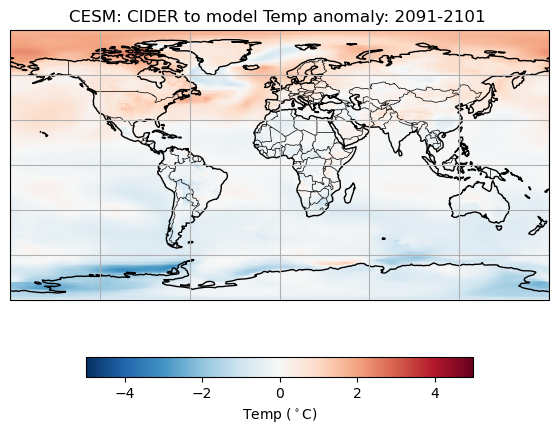

In [104]:
# anomaly to a year: models 

year_index = 61 # from 1940, last is 64
model2use = 'CESM'  #UKESM CESM 
scenario = 0    # 0 to 4: 0 = ssp245, 1= arc1, 2 = arc2, 3 = global, 4 = ant


cmap = 'RdBu_r'
norm = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)  # Adjust vmin/vmax to fit your data range
units = '($^\circ$C)'


if model2use == 'UKESM':
    pat_past_2035 = patterns_temp[0].sel(year = slice(2035,2100))
    pi = pat_past_2035.sel(year = 2035)
    anom = pat_past_2035 - pi
    in_dataset = anom.tas[year_index].rename({'y':'latitude', 'x':'longitude'}) #UKESM
    target_da = patterns_temp[1].tas[year_index].rename({'y':'latitude', 'x':'longitude'})  #CESM
    model_regridded = regrid(in_dataset, target_da).T
    data_to_plot = scens_pats_UKESM[scenario][:,:,year_index] - model_regridded
elif model2use == 'CESM':
    pat_past_2035 = patterns_temp[1].sel(year = slice(2035,2100))
    pi = pat_past_2035.sel(year = 2035)
    anom = pat_past_2035 - pi
    model_regridded = anom.tas[year_index].T  # no need to regrid
    data_to_plot = scens_pats_CESM[scenario][:,:,year_index] - model_regridded
else:
    print('uhm what')


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

img = ax.pcolormesh(lon2d, lat2d, data_to_plot, cmap=cmap, norm = norm)

plt.colorbar(img, orientation='horizontal', shrink = 0.5, label=f'{var} {units}')

title = f"{model2use}: CIDER to model {var} anomaly: {2035 + year_index -5}-{2035 + year_index+5} "
plt.title(title)
plt.savefig(f'figures/{title}.jpg', dpi=350)

plt.show()